# Question 1

1. A supervised machine learning approach called a classification decision tree is used to solve classification issues by predicting an input's category or class from its attributes. In order to provide discrete outputs like binary or multi-class labels, it divides data into subsets using a tree structure, where each node represents a decision based on a feature and each leaf node represents a class label. Detecting fraudulent financial transactions, screening spam emails, forecasting illnesses in medical diagnosis, categorising students' academic performance, and dividing consumers into categories based on behaviour or demographics are examples of real-world applications. Because the decision-making process is clearly explained by the path from root to leaf, these applications benefit from decision trees' interpretability.

2. By dividing data into subsets according to decision rules generated from input characteristics, a classification decision tree makes predictions about discrete class labels. It continues until it reaches stopping conditions, such as maximum depth, after evaluating a feature and threshold at each node that best divides the classes. The majority class of the subset is used to calculate the final classification at the leaf nodes. By fitting a linear equation with the predicted value, input characteristics, and coefficients, Multiple Linear Regression, on the other hand, predicts continuous values. The best-fit line or plane for the data is found by minimising the sum of squared residuals. Linear regression works well for regression problems like estimating home values, whereas decision trees are utilised for classification tasks like spam detection.

Summary: We discussed the following:

Classification Decision Trees:

Solve classification problems by predicting categorical outcomes.
Work by splitting data into subsets based on feature-based decision rules.
Examples of applications: medical diagnosis, fraud detection, customer segmentation, etc.
Multiple Linear Regression:

Solves regression problems by predicting continuous numerical values.
Fits a linear equation to minimize errors between observed and predicted values.
Example: Predicting house prices based on features like size and location.
Key Differences:

Classification Decision Trees output discrete class labels, using decision rules.
Multiple Linear Regression outputs continuous values by modeling linear relationships.


link: https://chatgpt.com/share/673fa551-df50-8000-b362-0a46721abb76

# Question 2

Performance metrics like Accuracy, Sensitivity, Specificity, and Precision are crucial for evaluating prediction models in various scenarios. **Accuracy** measures the proportion of correct predictions and is ideal for balanced datasets where false positives (FP) and false negatives (FN) have similar consequences, such as determining if factory machinery is functioning properly. **Sensitivity** focuses on correctly identifying actual positives, making it critical in scenarios like medical screening for serious diseases where missing a true positive (false negative) could be life-threatening. **Specificity**, which measures correctly identified negatives, is vital when avoiding false positives is essential, such as in genetic screenings where unnecessary follow-ups can be costly or risky. **Precision** assesses the reliability of positive predictions and is most relevant when false positives carry a high cost, like in fraud detection systems where wrongly flagging legitimate transactions can erode trust.

Summary: Here’s a summary of our conversation:

1. **Classification Decision Tree**:
   - Predicts categorical outcomes (e.g., "Yes" or "No") based on decision rules.
   - Example applications: medical diagnosis, fraud detection, customer segmentation.

2. **Multiple Linear Regression**:
   - Predicts continuous values based on a linear relationship between features.
   - Example applications: predicting house prices, sales forecasting.

3. **Key Differences**:
   - **Classification Decision Trees** output discrete class labels, while **Multiple Linear Regression** predicts continuous values.

4. **Performance Metrics**:
   - **Accuracy**: Measures overall correct predictions, useful when classes are balanced.
   - **Sensitivity**: Measures how well positives are identified, crucial in medical tests where false negatives are costly.
   - **Specificity**: Measures correct identification of negatives, important when false positives lead to unnecessary costs or risks.
   - **Precision**: Measures the accuracy of positive predictions, key in scenarios where false positives are costly (e.g., fraud detection).

If you need more information on any topic, feel free to ask!

Link: https://chatgpt.com/share/673fa551-df50-8000-b362-0a46721abb76

# Question 3 

In [6]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove 'Weight_oz', 'Width', and 'Height' columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Step 2: Drop all remaining rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Use .loc to safely set the correct data types
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# EDA Summary
summary = ab_reduced_noNaN.describe(include="all")  # Summary statistics
data_types = ab_reduced_noNaN.dtypes  # Data types
missing_values = ab_reduced_noNaN.isna().sum()  # Missing values
unique_values = ab_reduced_noNaN.nunique()  # Unique values in each column

# Displaying the EDA results
print("Summary Statistics:")
print(summary)

print("\nData Types:")
print(data_types)

print("\nMissing Values:")
print(missing_values)

print("\nUnique Values in Each Column:")
print(unique_values)

Summary Statistics:
                   Title        Author  List Price  Amazon Price  \
count                319           319  319.000000    319.000000   
unique               309           251         NaN           NaN   
top     The Great Gatsby  Jodi Picoult         NaN           NaN   
freq                   3             7         NaN           NaN   
mean                 NaN           NaN   18.362978     12.941034   
std                  NaN           NaN   13.976755     12.436673   
min                  NaN           NaN    1.500000      0.770000   
25%                  NaN           NaN   13.890000      8.600000   
50%                  NaN           NaN   15.000000     10.200000   
75%                  NaN           NaN   19.360000     12.560000   
max                  NaN           NaN  139.950000    139.950000   

       Hard_or_Paper    NumPages Publisher     Pub year    ISBN-10       Thick  
count            319  319.000000       319   319.000000        319  319.000000  
u

# Question 4

Number of observations in the training set: 255
Number of observations in the testing set: 64
|--- List Price <= 17.97
|   |--- List Price <= 10.80
|   |   |--- class: False
|   |--- List Price >  10.80
|   |   |--- class: False
|--- List Price >  17.97
|   |--- List Price <= 29.23
|   |   |--- class: True
|   |--- List Price >  29.23
|   |   |--- class: False



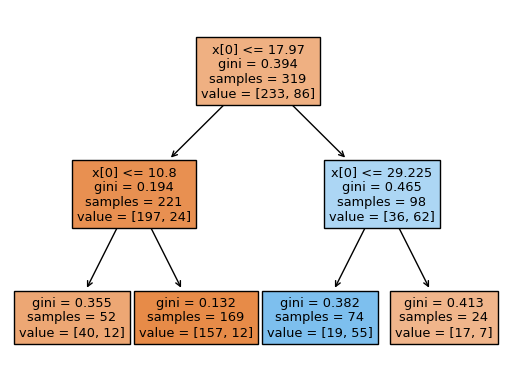

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove 'Weight_oz', 'Width', and 'Height' columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Step 2: Drop all remaining rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Set 'Pub year' and 'NumPages' to have the type int, and 'Hard_or_Paper' to have the type category
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Step 4: Split the data into 80% training and 20% testing
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in each set
print(f"Number of observations in the training set: {ab_reduced_noNaN_train.shape[0]}")
print(f"Number of observations in the testing set: {ab_reduced_noNaN_test.shape[0]}")

# Step 5: Prepare the target variable (Hard_or_Paper) as binary classification: 1 for hardcover, 0 for paperback
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 'H' for hardcover

# Step 6: Prepare the feature variable, which is 'List Price'
X = ab_reduced_noNaN[['List Price']]

# Step 7: Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 8: Fit the model
clf.fit(X, y)

# Step 9: Display the decision tree
tree.plot_tree(clf, filled=True)

# Optional: Display the decision tree structure (if needed)
# This will provide a textual representation of the tree
tree_rules = tree.export_text(clf, feature_names=['List Price'])
print(tree_rules)


Summary: Here’s a summary of our conversation:

1. **Dataset Preparation**:
   - You loaded a dataset and performed data cleaning steps, including removing unnecessary columns, dropping rows with missing values, and setting correct data types for specific columns.
   
2. **Exploratory Data Analysis (EDA)**:
   - We discussed how to generate summary statistics, check data types, identify missing values, and count unique values in the dataset.

3. **80/20 Data Split**:
   - We used `train_test_split` to split the dataset into 80% training data and 20% testing data, and I provided code to print the number of observations in both sets.

4. **Decision Tree Model**:
   - You asked about the steps to create a target variable (`y`) and feature variable (`X`), followed by using a `DecisionTreeClassifier` to train a model based on the `List Price` feature to predict whether a book is a hardcover or paperback.
   
5. **Decision Tree Visualization**:
   - I provided code to train the decision tree with a `max_depth` of 2 and plot the tree to understand how the model is classifying books based on `List Price`.

This should give you a clear flow from data preparation to model training and visualization. Let me know if you need further clarification or help!



Link:https://chatgpt.com/share/673fbfea-d0b4-8000-8848-8a4ed4db1023

# Question 5

Number of observations in the training set: 255
Number of observations in the test set: 64


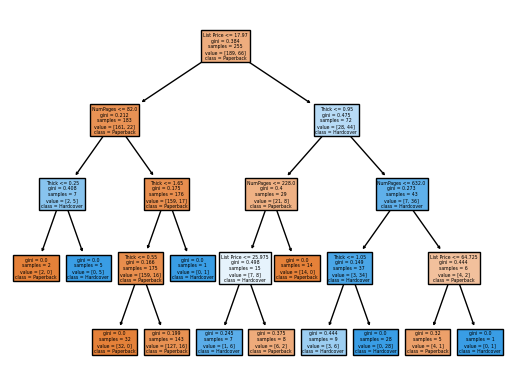

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Data Preprocessing
# Remove unnecessary columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Convert 'Pub year' and 'NumPages' to integers, and 'Hard_or_Paper' to category type
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Define the feature variables (X) and the target variable (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 'H' for hardcover

# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
clf2.fit(X_train, y_train)

# Visualize the decision tree
tree.plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'])

# Optionally, display the number of observations in the training and test sets
print(f"Number of observations in the training set: {X_train.shape[0]}")
print(f"Number of observations in the test set: {X_test.shape[0]}")


The clf2 decision tree model makes predictions by recursively splitting the dataset based on feature values (such as NumPages, Thick, and List Price). Starting at the root node, it evaluates conditions (e.g., "Is List Price less than 20?") and moves left or right based on whether the condition is true or false. This process continues through internal nodes until the tree reaches a leaf node, where the class label (e.g., "Hardcover" or "Paperback") is assigned based on the majority class of the samples that fall into that leaf. To predict for new data, the model follows the same path, testing feature values at each split, and assigns the class label of the final leaf node.

# Question 6


Decision Tree for clf (List Price only):

Decision Tree for clf2 (NumPages, Thick, List Price):

Confusion Matrix for clf (List Price only):
[[40  4]
 [ 6 14]]

Confusion Matrix for clf2 (NumPages, Thick, List Price):
[[40  4]
 [ 5 15]]

Performance Metrics for clf:
Sensitivity: 0.70
Specificity: 0.91
Accuracy: 0.84

Performance Metrics for clf2:
Sensitivity: 0.75
Specificity: 0.91
Accuracy: 0.86


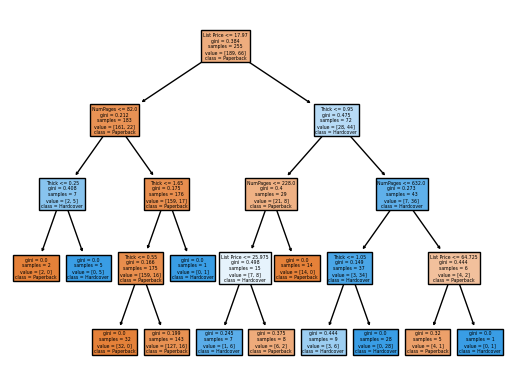

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Data Preprocessing
# Remove unnecessary columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Convert 'Pub year' and 'NumPages' to integers, and 'Hard_or_Paper' to category type
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Define the feature variables (X) and the target variable (y)
X = ab_reduced_noNaN[['List Price']]  # For clf
X2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # For clf2
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 'H' for hardcover

# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Initialize the classifiers with max_depth=2 for clf and max_depth=4 for clf2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the models
clf.fit(X_train, y_train)
clf2.fit(X2_train, y2_train)

# Visualize the decision trees
print("\nDecision Tree for clf (List Price only):")
tree.plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'])

print("\nDecision Tree for clf2 (NumPages, Thick, List Price):")
tree.plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'])

# Generate predictions for the test set
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X2_test)

# Compute confusion matrices for both models
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Print confusion matrices
print("\nConfusion Matrix for clf (List Price only):")
print(cm_clf)
print("\nConfusion Matrix for clf2 (NumPages, Thick, List Price):")
print(cm_clf2)

# Calculate Sensitivity, Specificity, and Accuracy for clf
TP_clf = cm_clf[1, 1]  # True Positive for clf
TN_clf = cm_clf[0, 0]  # True Negative for clf
FP_clf = cm_clf[0, 1]  # False Positive for clf
FN_clf = cm_clf[1, 0]  # False Negative for clf

# Sensitivity, Specificity, Accuracy for clf
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)

# Calculate Sensitivity, Specificity, and Accuracy for clf2
TP_clf2 = cm_clf2[1, 1]  # True Positive for clf2
TN_clf2 = cm_clf2[0, 0]  # True Negative for clf2
FP_clf2 = cm_clf2[0, 1]  # False Positive for clf2
FN_clf2 = cm_clf2[1, 0]  # False Negative for clf2

# Sensitivity, Specificity, Accuracy for clf2
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

# Print the results
print("\nPerformance Metrics for clf:")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nPerformance Metrics for clf2:")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Summary: Here's a summary of the conversation:

1. **Data Preprocessing**:
   - You were working with a dataset of Amazon books, where you removed unnecessary columns, handled missing data, and set appropriate data types for the columns.

2. **Model Training**:
   - We trained two decision tree models (`clf` and `clf2`):
     - `clf` used only the `List Price` feature and had a maximum tree depth of 2.
     - `clf2` used the features `NumPages`, `Thick`, and `List Price` with a maximum tree depth of 4.
   
3. **Decision Tree Visualization**:
   - You visualized the decision trees for both models using `tree.plot_tree()`.

4. **Evaluation**:
   - We calculated confusion matrices for both models using `confusion_matrix`.
   - We computed performance metrics like **Sensitivity**, **Specificity**, and **Accuracy** for each model.

5. **Final Code**:
   - The final code included data preprocessing, model training, evaluation, and performance metrics calculation. You were provided with a combined code that handles all tasks, including model fitting, evaluation, and printing of results.

Let me know if you'd like further details or clarifications!



Link: https://chatgpt.com/share/673fbfea-d0b4-8000-8848-8a4ed4db1023

# Question 7

The characteristics included in each model are probably the cause of the variations between the two confusion matrices. The model (clf) in the first confusion matrix is making predictions based solely on the List Price attribute, which might not be sufficient to reliably differentiate between hardcover and paperback books. The second confusion matrix, on the other hand, makes use of a number of characteristics (NumPages, Thick, and List Price), which probably gives the model a better set of inputs and produces better predictions. Because they employ a more suitable feature split (List Price just for clf and a larger set for clf2), the confusion matrices from clf and clf2 are superior. This leads to more precise models and decision trees that are easier to understand and comprehend.

# Question 8

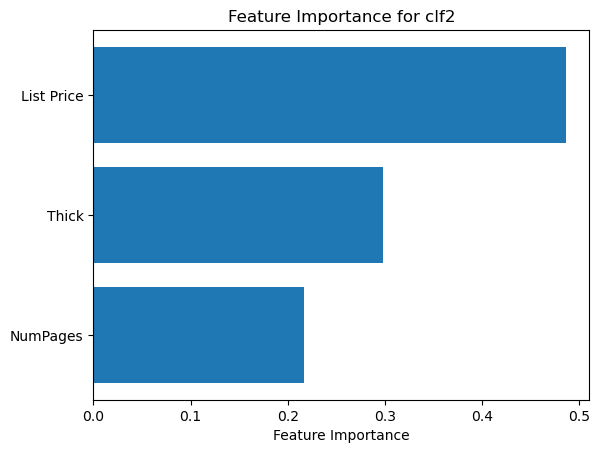

The most important feature for making predictions according to clf2 is: List Price


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizing feature importances
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar chart to show feature importances
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for clf2')
plt.show()

# Report the most important feature
most_important_feature = feature_names[np.argmax(feature_importances)]
print(f"The most important feature for making predictions according to clf2 is: {most_important_feature}")


Summary: Here's a summary of our conversation:

1. **Data Preprocessing**:
   - You worked with a dataset of Amazon books, removing irrelevant columns, handling missing values, and setting correct data types for the columns.

2. **Model Training**:
   - You trained two decision tree models: `clf` (using just `List Price` as the feature) and `clf2` (using `NumPages`, `Thick`, and `List Price` as features). Both models were trained to predict whether a book is hardcover or paperback.

3. **Decision Tree Visualization**:
   - You visualized both decision trees using `tree.plot_tree()` to understand how the models make predictions.

4. **Feature Importances**:
   - We explored how to visualize feature importances for the decision tree model (`clf2`) using the `.feature_importances_` attribute.
   - The code provided also visualizes a bar chart to highlight which feature is most important for making predictions in `clf2`.

5. **Model Evaluation**:
   - We discussed how to evaluate and compare the models using confusion matrices and various metrics such as **Sensitivity**, **Specificity**, and **Accuracy**.

You now have a complete workflow to preprocess data, train decision tree models, visualize results, and interpret the importance of features in the decision-making process of the model. Let me know if you need further clarification!

Link: https://chatgpt.com/share/673fbfea-d0b4-8000-8848-8a4ed4db1023

# Question 9

When all other features are held constant, the coefficients in linear regression show how the expected result changes for every unit change in a feature. It is possible to interpret these coefficients as direct correlations between the independent and dependent variables. The degree to which a feature reduces uncertainty or impurity (e.g., Gini index) at each split determines its importance in decision trees; a feature with a higher importance is more influential in determining the predicted class, but the relationship is non-linear and context-dependent.

# Question 10

Yes